In [41]:
import numpy as np
import scipy.misc as misc
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [2]:
import os
if not os.path.exists('./tmp_dataset/'):
    print('Making tmp_dataset folder to hold label information...')
    os.mkdir('./tmp_dataset/')
    print('Done.')

Making tmp_dataset folder to hold label information...
Done.


In [38]:
dataset_path = '/vision/group/EPIC-KITCHENS/'
annotations_foldername = 'annotations'
annotations_folderpath = os.path.join(dataset_path, annotations_foldername)
visual_dataset_path = os.path.join(dataset_path, 'EPIC_KITCHENS_2018')
visual_images_foldername = 'object_detection_images'
visual_images_folderpath = os.path.join(visual_dataset_path, visual_images_foldername)

# training data
training_action_labels = 'EPIC_train_action_labels.csv'
training_object_labels = 'EPIC_train_object_labels.csv'
train_action_csvpath = os.path.join(annotations_folderpath, training_action_labels)
train_object_csvpath = os.path.join(annotations_folderpath, training_object_labels)

assert os.path.exists(train_action_csvpath), "{} does not exist".format(train_action_csvpath)
assert os.path.exists(train_object_csvpath), "{} does not exist".format(train_object_csvpath)
assert os.path.exists(visual_images_folderpath), "{} does not exist".format(visual_images_folderpath)

In [66]:
first_k = 1
# unzipping all videos so far.
for element in os.listdir(os.path.join(visual_images_folderpath, 'train')):
    lower_path = os.path.join(os.path.join(visual_images_folderpath, 'train'), element)
    for element2 in os.listdir(lower_path)[:first_k]:
        subject_directory = os.path.join('./tmp_dataset', element)
        if not os.path.exists(subject_directory):
            os.mkdir(subject_directory)
        destination = os.path.join(subject_directory, element2[:-4])
        if not os.path.exists(destination):
            os.mkdir(destination)
        tar_path = os.path.join(lower_path, element2)
        !tar xvf $tar_path --directory $destination
        

./
./0000061651.jpg
./0000027751.jpg
./0000060451.jpg
./0000069151.jpg
./0000013771.jpg
./0000090511.jpg
./0000065521.jpg
./0000072841.jpg
./0000055861.jpg
./0000092431.jpg
./0000040741.jpg
./0000065461.jpg
./0000050431.jpg
./0000003421.jpg
./0000085651.jpg
./0000012361.jpg
./0000085321.jpg
./0000058681.jpg
./0000004321.jpg
./0000070261.jpg
./0000066931.jpg
./0000006721.jpg
./0000064531.jpg
./0000074941.jpg
./0000073291.jpg
./0000058531.jpg
./0000021061.jpg
./0000012451.jpg
./0000015781.jpg
./0000088561.jpg
./0000057091.jpg
./0000037831.jpg
./0000003091.jpg
./0000054061.jpg
./0000066001.jpg
./0000078991.jpg
./0000018451.jpg
./0000085171.jpg
./0000005161.jpg
./0000051091.jpg
./0000073441.jpg
./0000083971.jpg
./0000059251.jpg
./0000025291.jpg
./0000011431.jpg
./0000027271.jpg
./0000098311.jpg
./0000059791.jpg
./0000095341.jpg
./0000051391.jpg
./0000075001.jpg
./0000074221.jpg
./0000018841.jpg
./0000074191.jpg
./0000051121.jpg
./0000060211.jpg
./0000079231.jpg
./0000075541.jpg
./000000606

./0000032101.jpg
./0000022831.jpg
./0000082111.jpg
./0000054391.jpg
./0000021211.jpg
./0000097441.jpg
./0000057331.jpg
./0000066691.jpg
./0000076891.jpg
./0000050101.jpg
./0000054151.jpg
./0000008131.jpg
./0000035191.jpg
./0000096511.jpg
./0000082351.jpg
./0000054481.jpg
./0000052501.jpg
./0000021121.jpg
./0000098641.jpg
./0000013021.jpg
./0000072721.jpg
./0000005221.jpg
./0000019171.jpg
./0000080251.jpg
./0000090781.jpg
./0000070711.jpg
./0000016321.jpg
./0000001741.jpg
./0000019501.jpg
./0000071611.jpg
./0000081961.jpg
./0000039661.jpg
./0000071401.jpg
./0000028531.jpg
./0000036181.jpg
./0000002521.jpg
./0000087931.jpg
./0000024961.jpg
./0000030991.jpg
./0000079261.jpg
./0000096061.jpg
./0000063721.jpg
./0000065881.jpg
./0000006151.jpg
./0000060331.jpg
./0000050641.jpg
./0000081121.jpg
./0000084901.jpg
./0000072091.jpg
./0000025921.jpg
./0000063361.jpg
./0000063031.jpg
./0000032641.jpg
./0000093901.jpg
./0000043141.jpg
./0000018121.jpg
./0000014041.jpg
./0000058171.jpg
./0000037771.j

./0000040261.jpg
./0000000241.jpg
./0000048961.jpg
./0000003601.jpg
./0000024331.jpg
./0000059671.jpg
./0000051481.jpg
./0000018571.jpg
./0000092641.jpg
./0000064891.jpg
./0000035371.jpg
./0000034171.jpg
./0000009781.jpg
./0000068821.jpg
./0000060781.jpg
./0000075601.jpg
./0000051631.jpg
./0000076471.jpg
./0000084301.jpg
./0000002371.jpg
./0000017161.jpg
./0000038461.jpg
./0000080221.jpg
./0000081511.jpg
./0000062941.jpg
./0000055651.jpg
./0000011911.jpg
./0000071161.jpg
./0000093931.jpg
./0000077371.jpg
./0000057661.jpg
./0000030121.jpg
./0000082861.jpg
./0000013381.jpg
./0000050671.jpg
./0000032521.jpg
./0000092521.jpg
./0000058411.jpg
./0000035911.jpg
./0000053131.jpg
./0000004981.jpg
./0000020311.jpg
./0000032281.jpg
./0000094891.jpg
./0000034831.jpg
./0000084271.jpg
./0000075391.jpg
./0000074671.jpg
./0000064861.jpg
./0000045961.jpg
./0000015871.jpg
./0000091051.jpg
./0000073891.jpg
./0000004231.jpg
./0000041551.jpg
./0000008521.jpg
./0000087961.jpg
./0000032671.jpg
./0000017101.j

./0000047581.jpg
./0000082681.jpg
./0000030811.jpg
./0000020911.jpg
./0000017191.jpg
./0000062221.jpg
./0000029341.jpg
./0000033631.jpg
./0000010531.jpg
./0000008251.jpg
./0000092611.jpg
./0000008371.jpg
./0000043681.jpg
./0000003061.jpg
./0000083431.jpg
./0000033601.jpg
./0000069661.jpg
./0000096481.jpg
./0000013621.jpg
./0000011191.jpg
./0000012721.jpg
./0000007081.jpg
./0000006601.jpg
./0000092911.jpg
./0000021001.jpg
./0000041161.jpg
./0000025861.jpg
./0000086671.jpg
./0000034291.jpg
./0000006871.jpg
./0000036451.jpg
./0000050011.jpg
./0000052231.jpg
./0000019231.jpg
./0000049801.jpg
./0000028351.jpg
./0000068131.jpg
./0000076201.jpg
./0000008461.jpg
./0000080881.jpg
./0000057481.jpg
./0000081031.jpg
./0000054781.jpg
./0000078811.jpg
./0000052621.jpg
./0000016021.jpg
./0000018061.jpg
./0000008401.jpg
./0000045541.jpg
./0000056131.jpg
./0000093601.jpg
./0000046471.jpg
./0000071101.jpg
./0000047671.jpg
./0000007351.jpg
./0000059131.jpg
./0000026401.jpg
./0000001861.jpg
./0000096931.j

./0000009301.jpg
./0000048481.jpg
./0000052651.jpg
./0000028261.jpg
./0000041371.jpg
./0000049081.jpg
./0000033961.jpg
./0000002161.jpg
./0000028381.jpg
./0000048331.jpg
./0000020971.jpg
./0000033151.jpg
./0000085561.jpg
./0000072901.jpg
./0000093211.jpg
./0000032551.jpg
./0000006751.jpg
./0000014731.jpg
./0000052561.jpg
./0000054841.jpg
./0000073621.jpg
./0000062641.jpg
./0000049741.jpg
./0000056491.jpg
./0000035611.jpg
./0000061231.jpg
./0000030211.jpg
./0000051871.jpg
./0000017311.jpg
./0000035491.jpg
./0000016381.jpg
./0000027211.jpg
./0000085441.jpg
./0000023581.jpg
./0000036931.jpg
./0000002821.jpg
./0000053491.jpg
./0000096451.jpg
./0000072331.jpg
./0000081721.jpg
./0000033301.jpg
./0000050581.jpg
./0000070051.jpg
./0000083341.jpg
./0000013291.jpg
./0000067771.jpg
./0000025261.jpg
./0000069091.jpg
./0000029041.jpg
./0000028441.jpg
./0000070561.jpg
./0000089671.jpg
./0000007171.jpg
./0000038071.jpg
./0000064621.jpg
./0000076681.jpg
./0000017431.jpg
./0000051001.jpg
./0000048361.j

./0000049171.jpg
./0000019771.jpg
./0000086071.jpg
./0000004441.jpg
./0000011461.jpg
./0000084691.jpg
./0000080611.jpg
./0000074551.jpg
./0000008821.jpg
./0000067411.jpg
./0000061711.jpg
./0000046141.jpg
./0000093421.jpg
./0000034951.jpg
./0000048421.jpg
./0000098431.jpg
./0000000301.jpg
./0000050611.jpg
./0000085411.jpg
./0000052891.jpg
./0000050551.jpg
./0000050401.jpg
./0000061981.jpg
./0000057691.jpg
./0000091981.jpg
./0000010861.jpg
./0000023671.jpg
./0000083161.jpg
./0000058771.jpg
./0000026551.jpg
./0000081931.jpg
./0000010891.jpg
./0000057721.jpg
./0000003991.jpg
./0000078271.jpg
./0000094921.jpg
./0000016711.jpg
./0000022921.jpg
./0000034141.jpg
./0000032251.jpg
./0000054001.jpg
./0000057181.jpg
./0000000991.jpg
./0000083761.jpg
./0000037651.jpg
./0000006331.jpg
./0000069751.jpg
./0000056041.jpg
./0000085291.jpg
./0000034441.jpg
./0000038401.jpg
./0000005251.jpg
./0000066061.jpg
./0000081061.jpg
./0000065371.jpg
./0000068611.jpg
./0000051031.jpg
./0000090361.jpg
./0000032401.j

./0000032311.jpg
./0000000721.jpg
./0000055981.jpg
./0000079381.jpg
./0000080371.jpg
./0000026791.jpg
./0000027481.jpg
./0000024001.jpg
./0000059581.jpg
./0000050521.jpg
./0000002401.jpg
./0000088021.jpg
./0000040231.jpg
./0000012481.jpg
./0000041611.jpg
./0000023911.jpg
./0000052111.jpg
./0000031771.jpg
./0000016201.jpg
./0000074101.jpg
./0000095401.jpg
./0000086281.jpg
./0000097291.jpg
./0000044821.jpg
./0000097921.jpg
./0000027031.jpg
./0000013321.jpg
./0000060151.jpg
./0000041401.jpg
./0000067651.jpg
./0000033751.jpg
./0000004891.jpg
./0000038191.jpg
./0000043831.jpg
./0000066361.jpg
./0000058951.jpg
./0000072301.jpg
./0000020581.jpg
./0000001891.jpg
./0000068941.jpg
./0000002911.jpg
./0000008971.jpg
./0000041521.jpg
./0000088531.jpg
./0000018391.jpg
./0000012601.jpg
./0000025051.jpg
./0000023641.jpg
./0000072601.jpg
./0000000781.jpg
./0000030451.jpg
./0000026131.jpg
./0000016921.jpg
./0000067531.jpg
./0000034981.jpg
./0000054931.jpg
./0000007141.jpg
./0000066961.jpg
./0000097981.j

In [67]:
action_labels = pd.read_csv(train_action_csvpath)
object_labels = pd.read_csv(train_object_csvpath)

this_object_labels = object_labels.loc[(object_labels['participant_id'] == 'P01')\
                  &(object_labels['video_id'] == 'P01_01') \
                 & (object_labels['frame'] == 90091)]

In [78]:
this_object_labels

,noun_class,noun,participant_id,video_id,frame,bounding_boxes
1881,47,hob,P01,P01_01,90091,"[(70, 486, 888, 882)]"
2930,44,rice,P01,P01_01,90091,"[(432, 962, 290, 426)]"


In [77]:
for i in this_object_labels['bounding_boxes']:
    print(i)

[(70, 486, 888, 882)]
[(432, 962, 290, 426)]


In [79]:
for j in this_object_labels['noun']:
    print(j)

hob
rice


In [63]:
action_labels.loc[(action_labels['participant_id'] == 'P01') \
                  & (action_labels['video_id'] == 'P01_01')
                  & (action_labels['start_frame'] <= 90091) 
                  & (action_labels['stop_frame'] >= 90091)]

,uid,participant_id,video_id,narration,start_timestamp,stop_timestamp,start_frame,stop_frame,verb,verb_class,noun,noun_class,all_nouns,all_noun_classes
292,296,P01,P01_01,still stirring rice,00:24:30.04,00:25:05.28,88202,90316,stir,6,rice,44,['rice'],[44]


In [98]:
y1, x1, h, w = 70, 486, 888, 882

/sailhome/ianhuang/anaconda3/envs/.vidobj/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


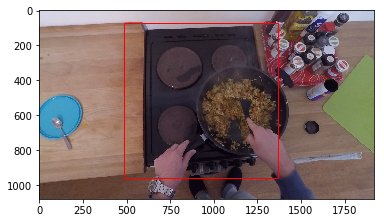

In [99]:
im_array = misc.imread('./tmp_dataset/P01/P01_01/0000090091.jpg')
plt.figure()
plt.imshow(im_array)
rect = Rectangle((x1, y1), w, h, fill=False, color='red')
plt.axes().add_patch(rect)
plt.show()   

/sailhome/ianhuang/anaconda3/envs/.vidobj/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


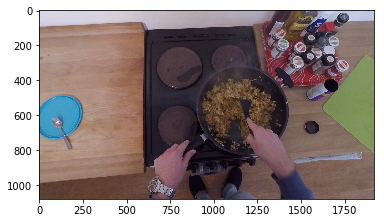

In [42]:
for subject_id in os.listdir('./tmp_dataset'):
    for video_id in os.listdir(os.path.join('./tmp_dataset', subject_id)):
        for frame in os.listdir(os.path.join(os.path.join('./tmp_dataset', subject_id), video_id))
            frame_num = int(frame[:-4])
            this_object_labels = object_labels.loc[(object_labels['participant_id'] == subject_id)\
                                                     &(object_labels['video_id'] == video_id) \
                                                     &(object_labels['frame'] == frame_num)]
            this_action_labels = action_labels.loc[(action_labels['participant_id'] == subject_id) \
                                                      & (action_labels['video_id'] == video_id) \
                                                      & (action_labels['start_frame'] <= frame_num) \
                                                      & (action_labels['stop_frame'] >= frame_num)]
            
            print()
            
# figure out participant_id
# figure out video_id
# figure out frame number
# --> get bounding boxes and class
# --> get action narration


